In [88]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import seaborn as sns

In [89]:
dir = "C:\\Users\\chloe\\wolkovich_s24\\TreeRings\\code\\focus_testng\\different_cookie"
images = []
rows = 15
cols = 16

image_filenames = os.listdir("{}".format(dir))

In [90]:
def compute_variance(image):
    # adapted from macro info at https://imagejdocu.list.lu/macro/normalized_variance
    #cast 0 as NAN
    mask_nan=image.astype('float')
    mask_nan[mask_nan==0]=np.nan

    mean = np.nanmean(image)
    width, height = image.shape
    square_diff = (image - mean)**2
    b = np.nansum(square_diff)
    normVar = b/(height * width * mean)
    return normVar

In [91]:
def hsl_mask(img):
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    s_channel = imgHSV[:,:,1]
    mask = cv2.inRange(s_channel, 0, 75)
    # mask = cv2.inRange(imgHSV, np.array([0,250,0]), np.array([255,255,255]))
    res =cv2.bitwise_and(imgRGB, imgRGB, mask=mask)
    return res

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\chloe\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


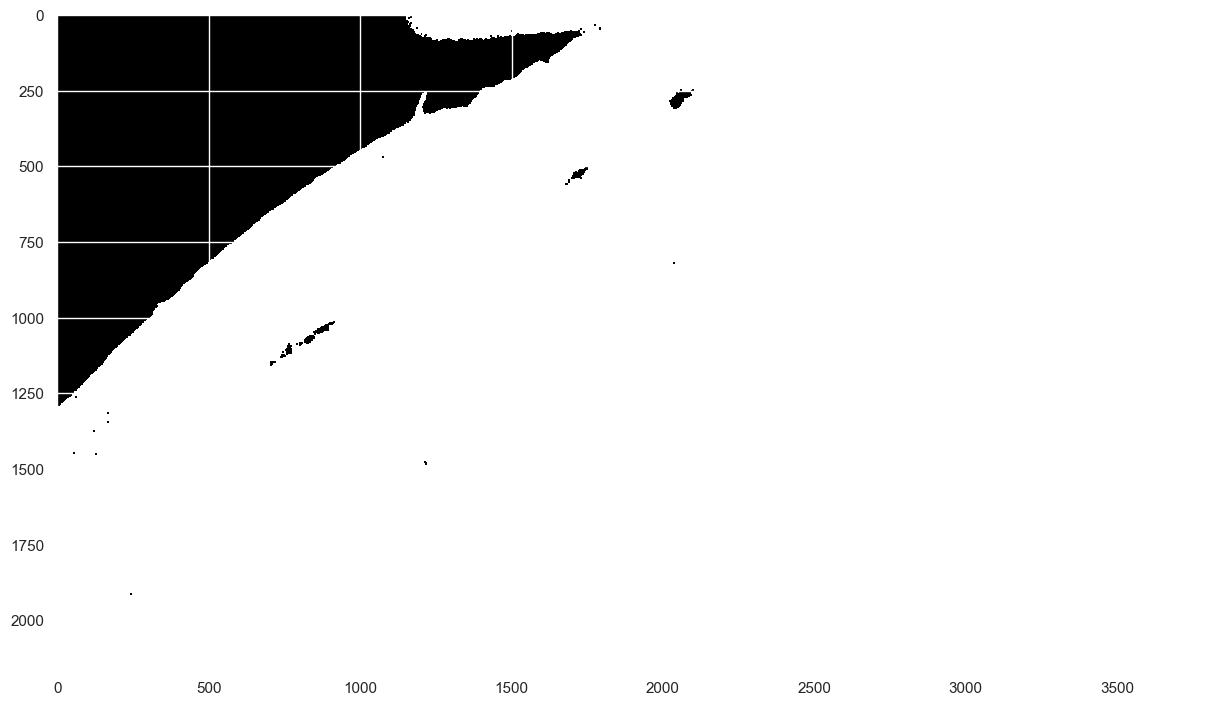

In [92]:
image = cv2.imread("{}\\focused_2_4.tiff".format(dir))
masked = hsl_mask(image)
plt.imshow(masked)

mask_nan=masked.astype('float')
mask_nan[mask_nan==0]=np.nan

compute_variance(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
np.count_nonzero(np.isnan(mask_nan))

plt.imshow(mask_nan)

In [93]:
variance_matrix =[]

for x in range(rows):
    row_matrix = []
    for y in range(cols):
        image = cv2.imread("{}\\focused_{}_{}.tiff".format(dir, x, y))
        masked_image = hsl_mask(image)

        grayscale_image = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)
        variance = compute_variance(grayscale_image)
        row_matrix.append(variance)
    variance_matrix.append(row_matrix)

C:\Users\chloe\AppData\Local\Temp\ipykernel_22340\435107605.py:11: RuntimeWarning: invalid value encountered in scalar divide
  normVar = b/(height * width * mean)


<Axes: >

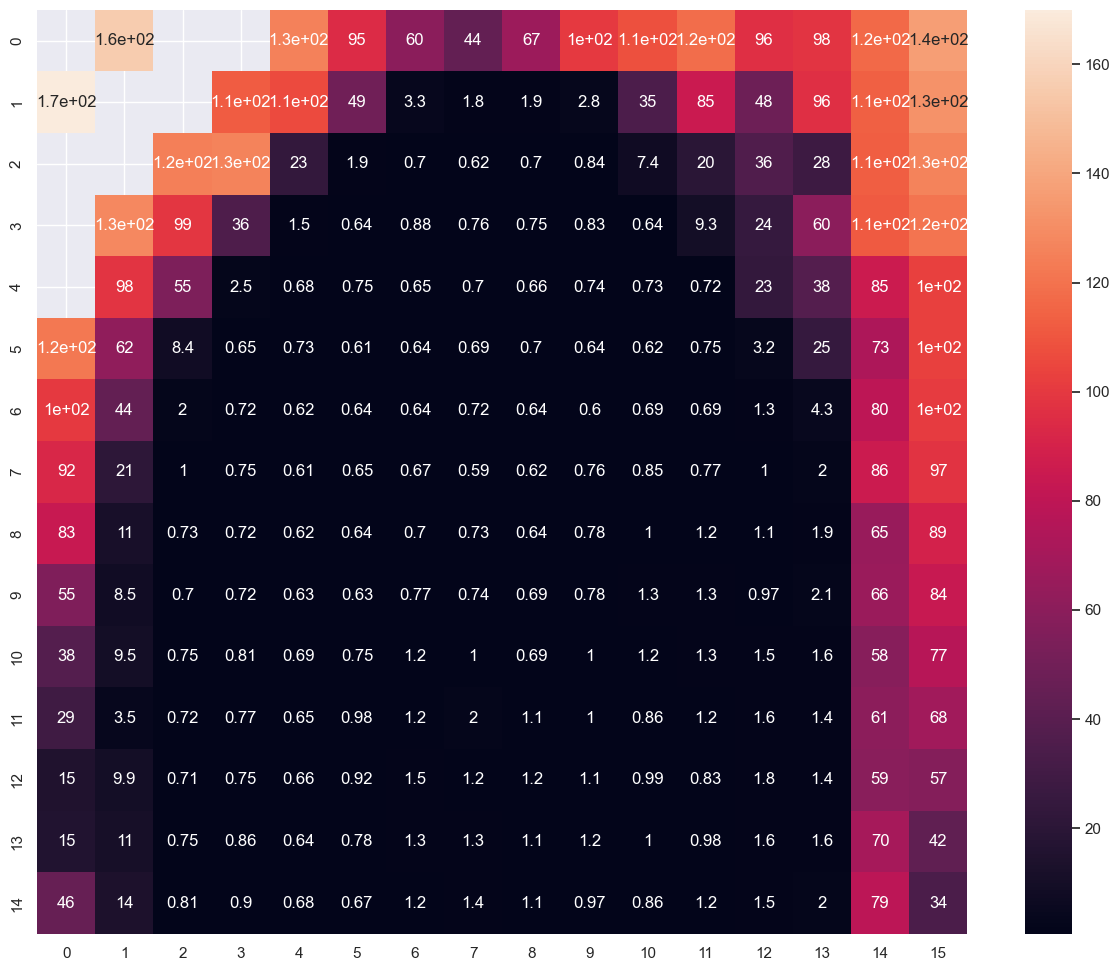

In [94]:
sns.set_theme(rc={'figure.figsize':(15,12)})
sns.heatmap(variance_matrix, annot=True)